Если библиотека была просто склонирована (git clone), то для запуска необходимо указать путь до каталога с исходниками. Для этого ноутбука это родительская директория, поэтому достаточно указать os.path.abspath(os.path.join('..'))

In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from cvints import HumanDetectionDataset

Если библиотека была установлена через pip, то этого делать не нужно, но и тестировать свежий код будет сложнее, поэтому пока оптимальный вариант для разработки - это клонирование и подключение библиотеки из исходников

Заранее укажем путь до изображений и файла с разметкой

In [2]:
path_to_images = 'C:\\Users\\vboychuk\\Work\\Projects\\Conference room\\Dataset\\PIC_2.0\\image\\val'
path_to_annotations_file = 'C:\\Users\\vboychuk\\Work\\Projects\\Conference room\\Dataset\\PIC_2.0\\val_.json'

Создадим экземпляр класса HumanDetectionDataset, передадим параметры с путями до изображений и файоа с разметкой

In [3]:
dataset = HumanDetectionDataset(path_to_data=path_to_images, path_to_annotations_file=path_to_annotations_file)

Для описания того, что находится внутри переменной dataset, пока сделан один метод - describe_gt(with_plots=False)

Первый запуск - без графика

In [18]:
dataset.describe_gt()

Images number in dataset = 1977
Persons number in dataset = 7339
Mean value of persons per image = 3.72
Median value of persons per image = 3.00
Std value of persons per image = 2.10


Images number in dataset = 1977
Persons number in dataset = 7339
Mean value of persons per image = 3.72
Median value of persons per image = 3.00
Std value of persons per image = 2.10


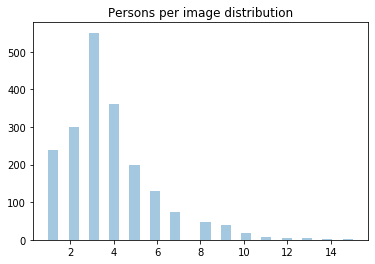

In [21]:
dataset.describe_gt(with_plots=True)

Чтобы рассмотреть примеры разметки изображений, создадим новый экземпляр объекта того же класса, вызвав метод get_subset(dataset, size=5). Новый объект будет содержать только часть исходного, будут выбраны n-случайных изображений. n передаётся параметром.

In [5]:
sample_from_ds = HumanDetectionDataset.get_subset(dataset)

Действительно, внутри класса информация только о 5 изображениях

In [7]:
sample_from_ds

{'images_info': [{'file_name': '26539.jpg',
   'height': 1600,
   'width': 1293,
   'id': 1848},
  {'file_name': 'indoor_05842.jpg', 'height': 960, 'width': 1706, 'id': 464},
  {'file_name': '21771.jpg', 'height': 5461, 'width': 8213, 'id': 1807},
  {'file_name': 'outdoor_00422.jpg', 'height': 1331, 'width': 1024, 'id': 499},
  {'file_name': 'indoor_01243.jpg', 'height': 960, 'width': 1571, 'id': 617}],
 'annotations_info': [{'iscrowd': 0,
   'image_id': 464,
   'bbox': [463, 229, 130, 730],
   'category_id': 1,
   'id': 4223},
  {'iscrowd': 0,
   'image_id': 464,
   'bbox': [581, 266, 279, 693],
   'category_id': 1,
   'id': 4224},
  {'iscrowd': 0,
   'image_id': 464,
   'bbox': [213, 74, 449, 885],
   'category_id': 1,
   'id': 4225},
  {'iscrowd': 0,
   'image_id': 464,
   'bbox': [0, 172, 165, 787],
   'category_id': 1,
   'id': 4226},
  {'iscrowd': 0,
   'image_id': 464,
   'bbox': [915, 149, 239, 766],
   'category_id': 1,
   'id': 4228},
  {'iscrowd': 0,
   'image_id': 499,
   '

In [9]:
sample_from_ds.describe_gt()

Images number in dataset = 5
Persons number in dataset = 20
Mean value of persons per image = 4.00
Median value of persons per image = 4.00
Std value of persons per image = 2.45


Images number in dataset = 5
Persons number in dataset = 20
Mean value of persons per image = 4.00
Median value of persons per image = 4.00
Std value of persons per image = 2.45


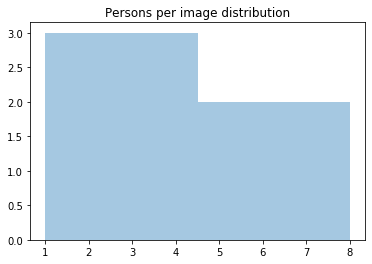

In [10]:
sample_from_ds.describe_gt(with_plots=True)

Вызовем метод draw_gt_bboxes(draw_bboxes_separately=False, bbox_line_width=3), который выведет изображения с нарисованными рамками исходной разметки, которая принята за ground truth. Второй параметр отвечает за толщину линии при отрисовки рамок, но пока работает как-то плохо. Часть рамок иногда не отображается независимо от значения параметра bbox_line_width. 

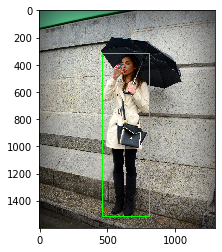

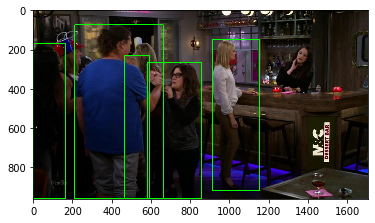

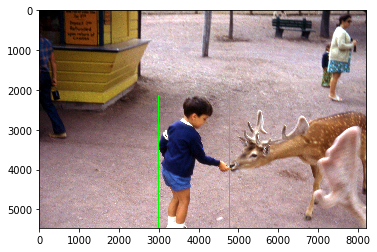

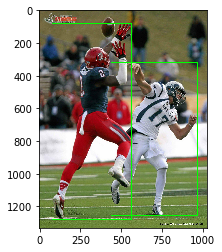

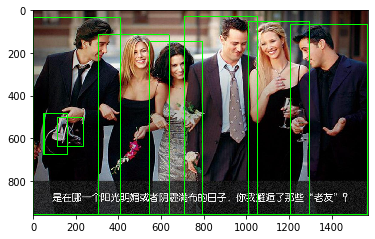

In [11]:
sample_from_ds.draw_gt_bboxes()

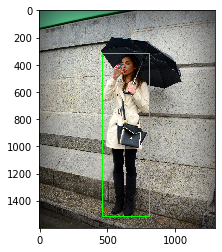

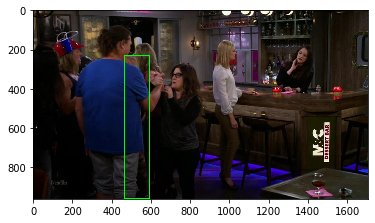

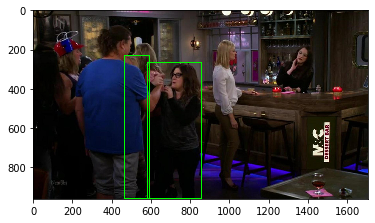

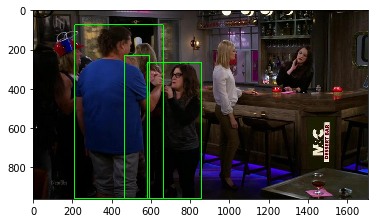

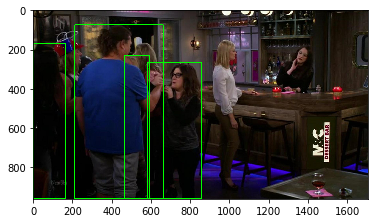

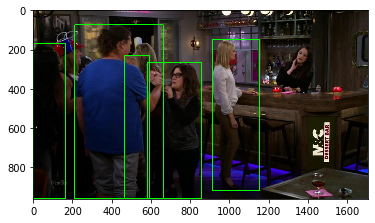

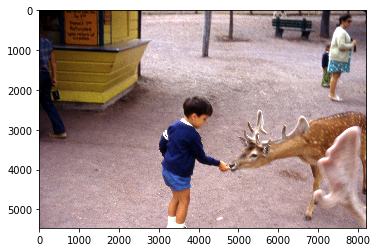

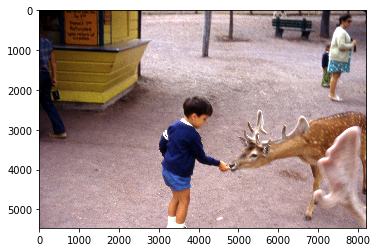

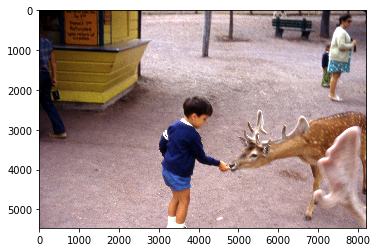

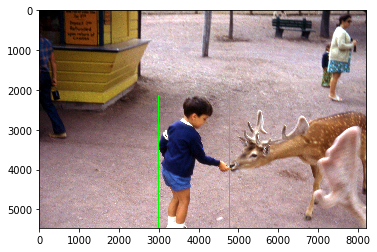

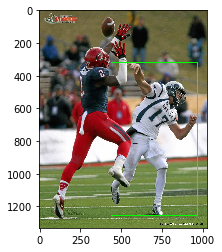

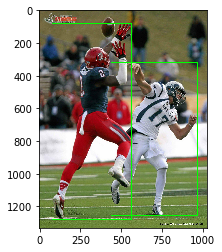

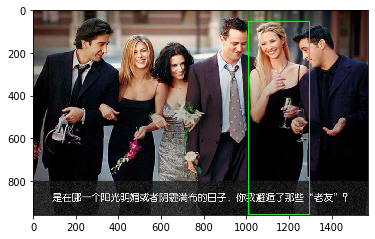

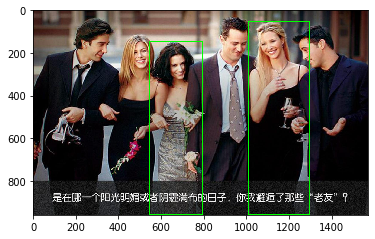

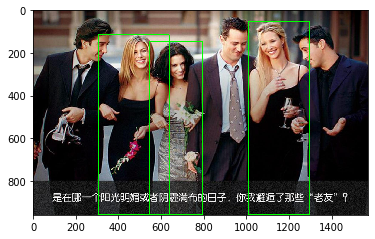

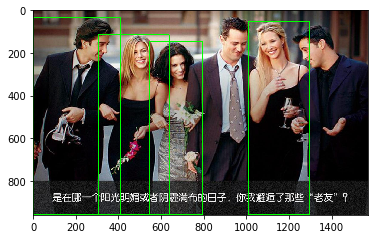

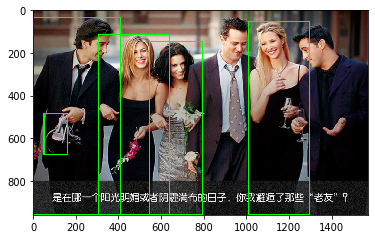

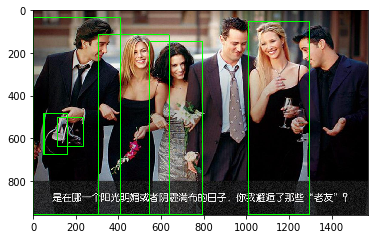

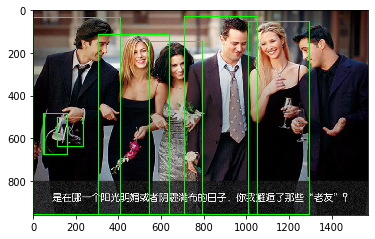

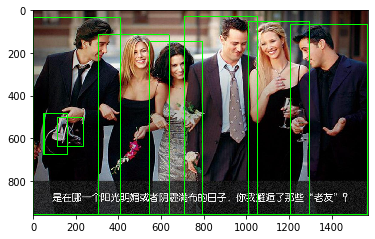

In [12]:
sample_from_ds.draw_gt_bboxes(draw_bboxes_separately=True)